# 1. Data Extraction and Exploratory Data Analysis

The first step is to extract data from some source/s (web or local) and then to explore it, i.e. to do the exploratory data analysis.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root="../data/raw/",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [3]:
ls ..\\data\\raw\\FashionMNIST\\processed

 Volume in drive C has no label.
 Volume Serial Number is C848-4D31

 Directory of C:\Users\Matija\Desktop\main\ai\development\fmnist_pytorch_fcffm\data\raw\FashionMNIST\processed

04/26/2021  05:29 PM    <DIR>          .
04/26/2021  05:29 PM    <DIR>          ..
04/26/2021  05:29 PM         7,921,087 test.pt
04/26/2021  05:29 PM        47,521,087 training.pt
               2 File(s)     55,442,174 bytes
               2 Dir(s)  15,956,570,112 bytes free


In [4]:
test_set = torchvision.datasets.FashionMNIST(
    root="../data/raw/",
    train=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Test set is also downloaded (together with the train set) so we just need to import it with almost the same command.

In [5]:
type(train_set)

torchvision.datasets.mnist.FashionMNIST

In [6]:
len(train_set)

60000

There are 60 000 images in the train set.

In [7]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
torch.unique(train_set.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

This problem is a multiclass classification problem with 10 different classes throughout our train set.

In [9]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

Same number of instances in each class means that the train set is a balanced one.

In [10]:
image, target = train_set[0]
image.shape

torch.Size([1, 28, 28])

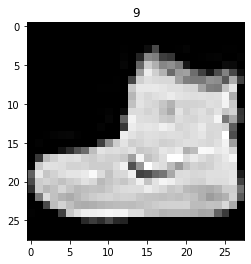

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(target)
plt.show()

In [10]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

These are previously mentioned 10 classes that exist in our train set.

In [11]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

Wraping our train set with a DataLoader class which can help us with defining a batch size, data shuffling, model training, etc.

In [12]:
train_loader

In [13]:
train_set_iter = iter(train_loader)
batch = next(train_set_iter)

Transforming the train_loader into an iterator and getting the first batch of images.

In [14]:
len(batch)

2

First part of the batch are images in rank-4 tensor format. Number of images in batch have been specified few lines above where we created the train loader. Second part are labes/targets of images in batch.

In [15]:
type(batch)

list

In [16]:
images, targets = batch

In [17]:
images.shape

torch.Size([10, 1, 28, 28])

This is a rank-4 tensor with four axes. Each index in the tensor's shape represents a specific axis, and the value at each index gives us the length of the corresponding axis. First axis is a batch size, second is number of channels, third is an image height and fourth is an image width.

In [18]:
print(images[0, 0, :, :].min())
print(images[0, 0, :, :].max())

tensor(0.)
tensor(1.)


These images are also normalized, i.e. all pixel values, for each image, are between zero and one.

In [19]:
targets.shape

torch.Size([10])

targets: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


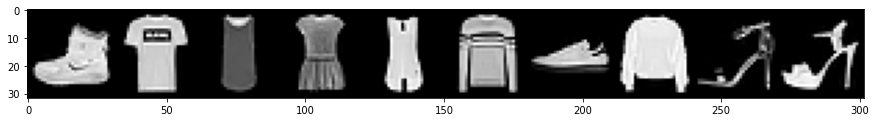

In [20]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(grid.permute(1, 2, 0))

print(f"targets: {targets.tolist()}")

In [21]:
batch = next(train_set_iter)

Getting the second batch of images and the targets from the train set.

In [22]:
images, targets = batch

targets: [0, 9, 5, 5, 7, 9, 1, 0, 6, 4]


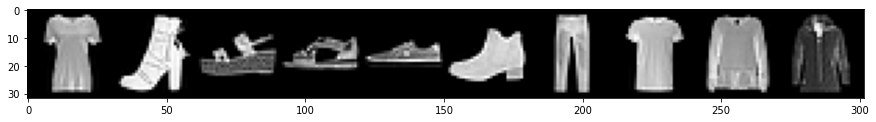

In [23]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(grid.permute(1, 2, 0))

print(f"targets: {targets.tolist()}")

In [24]:
torch.save(train_set, "..\\data\\processed\\train.pt")

Saving our processed train set into our "processed" data folder, from our template (not the one that was created after we downloaded the training set).

**Now, we are going to inspect, just a little bit, our test set to see if everything is alright**

In [11]:
print("type:", type(test_set))
print("length:", len(test_set))
print("targets/labels:", test_set.targets)
print("unique labels:", torch.unique(test_set.targets))
print("distribution of labels:", test_set.targets.bincount())

type: <class 'torchvision.datasets.mnist.FashionMNIST'>
length: 10000
targets/labels: tensor([9, 2, 1,  ..., 8, 1, 5])
unique labels: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
distribution of labels: tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])


For now, everything is alright

In [12]:
test_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

shape of first image in the test set: torch.Size([1, 28, 28])
max value in the image: tensor(1.)


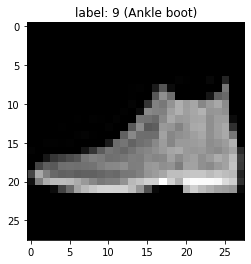

In [13]:
test_image, test_target = test_set[0]
print("shape of first image in the test set:", test_image.shape)
print("max value in the image:", test_image.squeeze().max())
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title(f"label: {target} ({test_set.classes[target]})")
plt.show()

In [14]:
torch.save(test_set, "..\\data\\processed\\test.pt")

Everything is as we've expected, so we can save the test set.